# 1. Data Loading and Initial Checks:

In [73]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [74]:
# 1. Loading the Data:
transactions = pd.read_csv('/Users/debabratapanda/PycharmProjects/forage/quantium/QVI_transaction_data.csv')
customers = pd.read_csv('/Users/debabratapanda/PycharmProjects/forage/quantium/QVI_purchase_behaviour.csv')
print("Data loaded successfully.")

Data loaded successfully.


In [75]:
# 2. Initial Data Exploration and Cleaning (Transactions Data):
print("\n--- Transactions Data Overview ---")
transactions.head()


--- Transactions Data Overview ---


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [76]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [77]:
transactions.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [78]:
# Check for missing values
print("\nMissing values in Transactions Data:")
print(transactions.isnull().sum())


Missing values in Transactions Data:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [79]:
# Check for duplicates
print("\nNumber of duplicate rows in Transactions Data:", transactions.duplicated().sum())


Number of duplicate rows in Transactions Data: 1


In [80]:
# Initial look at unique values in categorical columns (adjust column names as needed)
for col in transactions.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(transactions[col].unique()[:20])  # Displaying first 20 for brevity


Unique values in PROD_NAME:
['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g']


In [81]:
# Data Format Corrections (Transactions)
if 'DATE' in transactions:
    # Convert 'DATE' column to datetime (assuming it's days since 1899-12-30)
    def convert_excel_date(excel_date):
        return pd.to_datetime('1899-12-30') + pd.to_timedelta(excel_date, unit='D')

    transactions['DATE'] = transactions['DATE'].apply(convert_excel_date)
    print("\nDATE column converted to datetime.")
    print(transactions['DATE'].head())


DATE column converted to datetime.
0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]


In [82]:
# Remove duplicate rows
transactions = transactions.drop_duplicates()
print("\nDuplicate rows removed.")
print("\nNumber of rows after removing duplicates:", len(transactions))


Duplicate rows removed.

Number of rows after removing duplicates: 264835



--- Outlier Detection (Transactions - Numeric) ---


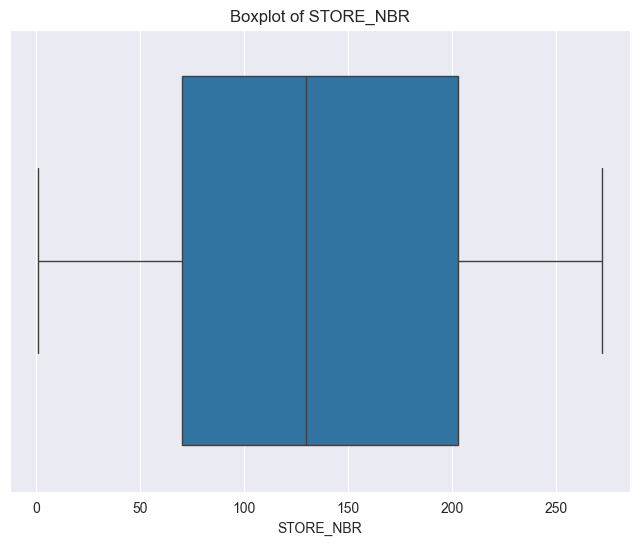


Number of outliers in STORE_NBR (IQR method): 0


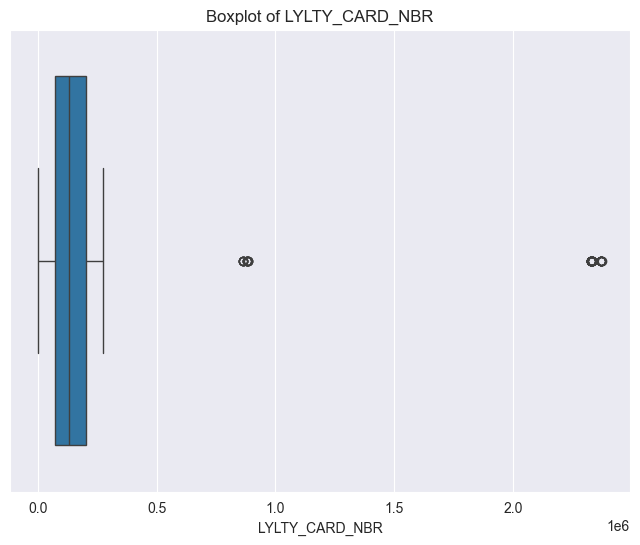


Number of outliers in LYLTY_CARD_NBR (IQR method): 44


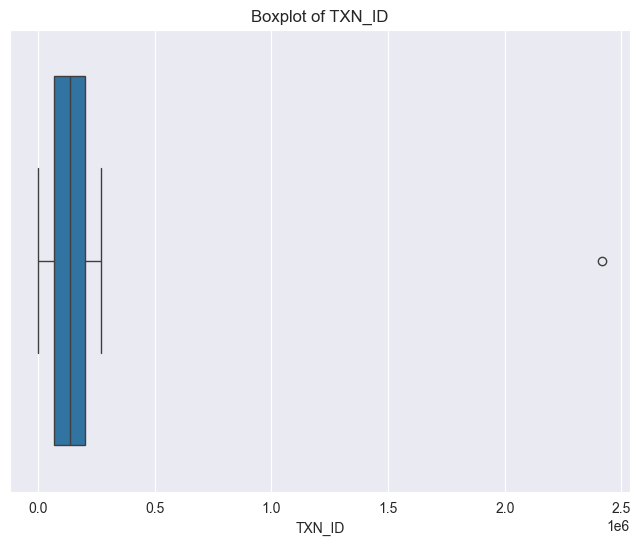


Number of outliers in TXN_ID (IQR method): 1


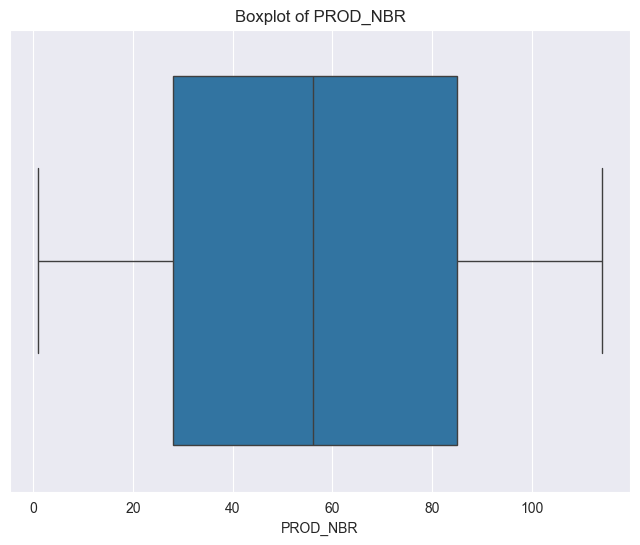


Number of outliers in PROD_NBR (IQR method): 0


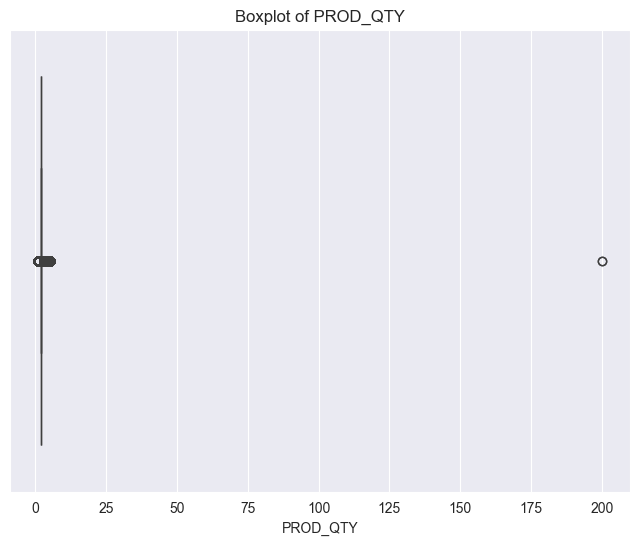


Number of outliers in PROD_QTY (IQR method): 28797


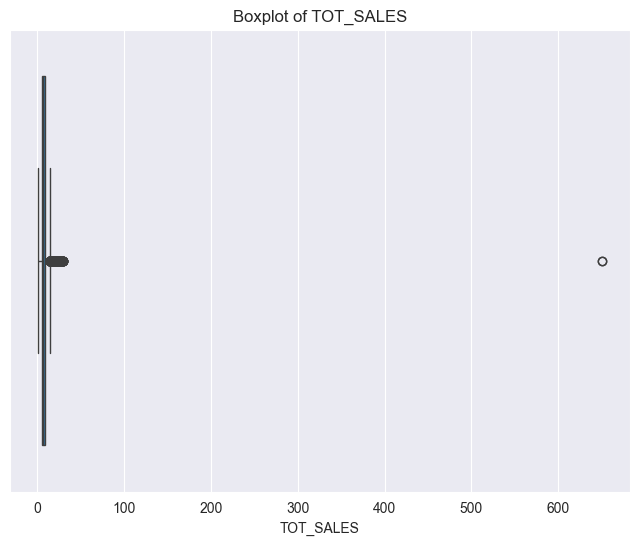


Number of outliers in TOT_SALES (IQR method): 578


In [83]:
# Outlier Detection and Handling (Transactions - Numeric)
print("\n--- Outlier Detection (Transactions - Numeric) ---")
numeric_cols_transactions = transactions.select_dtypes(include=np.number).columns
for col in numeric_cols_transactions:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=transactions[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

    # Example of a simple IQR-based outlier removal (be cautious and understand your data)
    Q1 = transactions[col].quantile(0.25)
    Q3 = transactions[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = transactions[(transactions[col] < lower_bound) | (transactions[col] > upper_bound)]
    print(f"\nNumber of outliers in {col} (IQR method): {len(outliers)}")
    # Decide if and how to remove outliers based on context
    # transactions = transactions[~((transactions[col] < lower_bound) | (transactions[col] > upper_bound))]
    # print(f"Shape after outlier removal in {col}: {transactions.shape}")

In [84]:
# 3. Initial Data Exploration and Cleaning (Customer Data):
print("\n--- Customer Data Overview ---")
customers.head()


--- Customer Data Overview ---


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [85]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [86]:
customers.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [87]:
# Check for missing values
print("\nMissing values in Customer Data:")
print(customers.isnull().sum())


Missing values in Customer Data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [88]:
# Check for duplicates (based on a unique identifier if available)
print("\nNumber of duplicate rows in Customer Data:", customers.duplicated().sum())


Number of duplicate rows in Customer Data: 0


In [89]:
# Initial look at unique values in categorical columns
for col in customers.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(customers[col].unique()[:20])  # Displaying first 20 for brevity


Unique values in LIFESTAGE:
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']

Unique values in PREMIUM_CUSTOMER:
['Premium' 'Mainstream' 'Budget']


# 2. Feature Engineering:



In [90]:
# Function to extract brand name
def extract_brand_name(prod_name):
    if isinstance(prod_name, str):
        words = prod_name.split()
        brand_name = words[0].strip().lower()  # Start with the first word

        # Handle potential multi-word brand names (e.g., "Natural Chip Compny")
        if brand_name == "natural":
            brand_name = "natural chip compny"
        elif brand_name == "red":
            brand_name = "red rock deli"
        elif brand_name == "grain":
            brand_name = "grain waves"
        elif brand_name == "smiths":
            brand_name = "smiths"
        elif brand_name == "doritos":
            brand_name = "doritos"
        elif brand_name == "cc's":
            brand_name = "cc's"
        elif brand_name == "kettle":
            brand_name = "kettle"
        elif brand_name == "cheezels":
            brand_name = "cheezels"
        elif brand_name == "burger":
            brand_name = "burger rings"
        elif brand_name == "pringle":
            brand_name = "pringle"
        elif brand_name == "twisties":
            brand_name = "twisties"
        elif brand_name == "ww":
            brand_name = "ww"
        elif brand_name == "thins":
            brand_name = "thins"
        elif brand_name == "ncc":
            brand_name = "ncc"
        elif brand_name == "old":
            brand_name = "old el paso"

        return brand_name
    return None

# Function to extract pack size
def extract_pack_size(prod_name):
    if isinstance(prod_name, str):
        match = re.search(r'(\d+)(g|ml|G)', prod_name, re.IGNORECASE)
        if match:
            return match.group(1) + match.group(2).lower()
    return None

In [91]:
# Apply the extraction functions
transactions['BRAND_NAME'] = transactions['PROD_NAME'].apply(extract_brand_name)
transactions['PACK_SIZE'] = transactions['PROD_NAME'].apply(extract_pack_size)

In [92]:
# Display the results
print("\nBrand Name Extraction:")
print(transactions[['PROD_NAME', 'BRAND_NAME']].head())


Brand Name Extraction:
                                  PROD_NAME           BRAND_NAME
0    Natural Chip        Compny SeaSalt175g  natural chip compny
1                  CCs Nacho Cheese    175g                  ccs
2    Smiths Crinkle Cut  Chips Chicken 170g               smiths
3    Smiths Chip Thinly  S/Cream&Onion 175g               smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g               kettle


In [93]:
print("\nPack Size Extraction:")
print(transactions[['PROD_NAME', 'PACK_SIZE']].head())


Pack Size Extraction:
                                  PROD_NAME PACK_SIZE
0    Natural Chip        Compny SeaSalt175g      175g
1                  CCs Nacho Cheese    175g      175g
2    Smiths Crinkle Cut  Chips Chicken 170g      170g
3    Smiths Chip Thinly  S/Cream&Onion 175g      175g
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g      150g


# 3. Merging Transaction and Customer Data:



In [94]:
# 5. Merge Transaction and Customer Data:
print("\n--- Merging DataFrames ---")
# Assuming there's a common customer identifier column (e.g., 'LYLTY_CARD_NBR')
merged_df = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='inner')  # Or 'left' depending on your needs
print("Merged DataFrame shape:", merged_df.shape)
merged_df.head()


--- Merging DataFrames ---
Merged DataFrame shape: (264835, 12)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,natural chip compny,175g,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,ccs,175g,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,smiths,170g,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,smiths,175g,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,kettle,150g,MIDAGE SINGLES/COUPLES,Budget


# 4. Defining Metrics of Interest:

In [95]:
# Total spend by LIFESTAGE and PREMIUM_CUSTOMER
segment_spend = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
segment_spend.rename(columns={'TOT_SALES': 'TOTAL_SPEND'}, inplace=True)
print("\nTotal spend by LIFESTAGE and PREMIUM_CUSTOMER:")
segment_spend.head()


Total spend by LIFESTAGE and PREMIUM_CUSTOMER:


,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL_SPEND
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90


In [96]:
# Number of transactions by LIFESTAGE and PREMIUM_CUSTOMER
segment_transactions = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='NUM_TRANSACTIONS')
print("\nNumber of transactions by LIFESTAGE and PREMIUM_CUSTOMER:")
segment_transactions.head()


Number of transactions by LIFESTAGE and PREMIUM_CUSTOMER:


,LIFESTAGE,PREMIUM_CUSTOMER,NUM_TRANSACTIONS
0,MIDAGE SINGLES/COUPLES,Budget,5020
1,MIDAGE SINGLES/COUPLES,Mainstream,11874
2,MIDAGE SINGLES/COUPLES,Premium,8216
3,NEW FAMILIES,Budget,3005
4,NEW FAMILIES,Mainstream,2325


In [97]:
# Average transaction value by LIFESTAGE and PREMIUM_CUSTOMER
segment_metrics = pd.merge(segment_spend, segment_transactions, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])
segment_metrics['AVG_TRANSACTION_VALUE'] = segment_metrics['TOTAL_SPEND'] / segment_metrics['NUM_TRANSACTIONS']
print("\nAverage transaction value by LIFESTAGE and PREMIUM_CUSTOMER:")
segment_metrics.head()


Average transaction value by LIFESTAGE and PREMIUM_CUSTOMER:


,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL_SPEND,NUM_TRANSACTIONS,AVG_TRANSACTION_VALUE
0,MIDAGE SINGLES/COUPLES,Budget,35514.80,5020,7.074661
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,11874,7.647284
2,MIDAGE SINGLES/COUPLES,Premium,58432.65,8216,7.112056
3,NEW FAMILIES,Budget,21928.45,3005,7.297321
4,NEW FAMILIES,Mainstream,17013.90,2325,7.317806


In [98]:
# Preferred brands by LIFESTAGE and PREMIUM_CUSTOMER
preferred_brands_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['BRAND_NAME'].agg(lambda x: x.value_counts().index[0] if len(x) > 0 else None).reset_index(name='PREFERRED_BRAND')
print("\nPreferred brand by LIFESTAGE and PREMIUM_CUSTOMER (top choice):")
preferred_brands_segment.head()


Preferred brand by LIFESTAGE and PREMIUM_CUSTOMER (top choice):


,LIFESTAGE,PREMIUM_CUSTOMER,PREFERRED_BRAND
0,MIDAGE SINGLES/COUPLES,Budget,kettle
1,MIDAGE SINGLES/COUPLES,Mainstream,kettle
2,MIDAGE SINGLES/COUPLES,Premium,kettle
3,NEW FAMILIES,Budget,kettle
4,NEW FAMILIES,Mainstream,kettle


# 5. Data Analysis and Visualization:

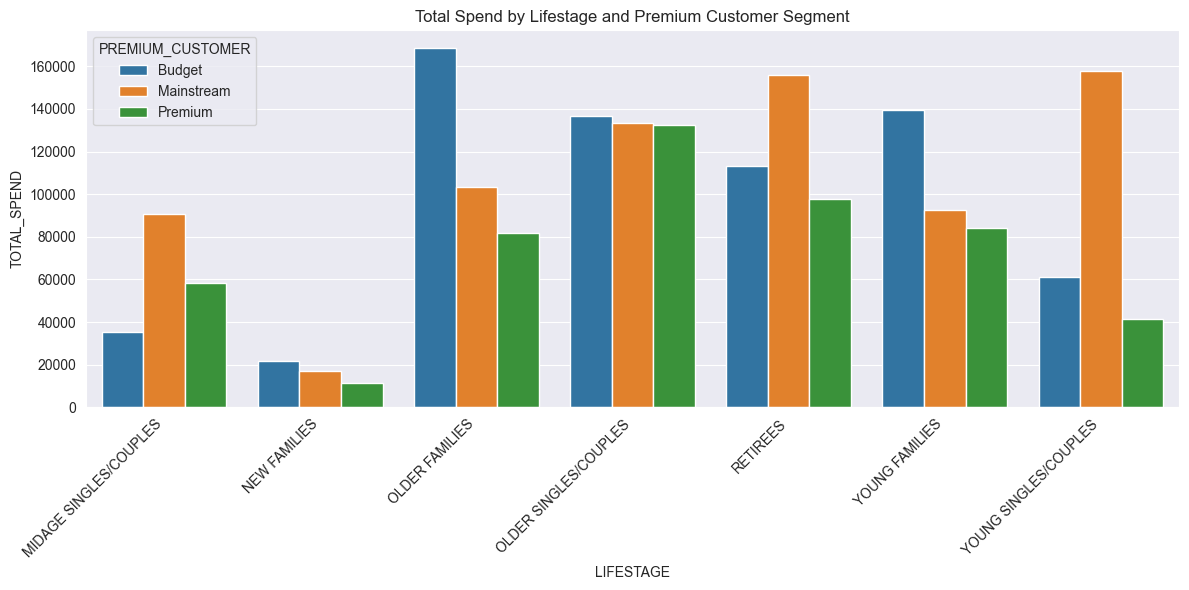

In [102]:
# Example: Total Spend by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOTAL_SPEND', hue='PREMIUM_CUSTOMER', data=segment_metrics)
plt.title('Total Spend by Lifestage and Premium Customer Segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

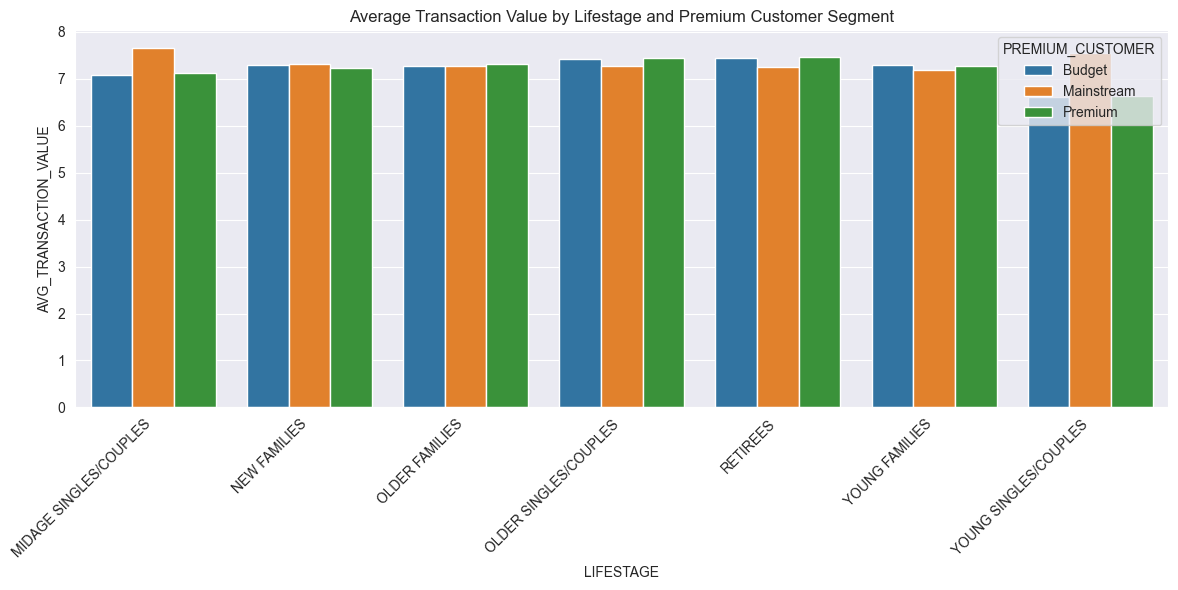

In [103]:
# Example: Average Transaction Value
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='AVG_TRANSACTION_VALUE', hue='PREMIUM_CUSTOMER', data=segment_metrics)
plt.title('Average Transaction Value by Lifestage and Premium Customer Segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

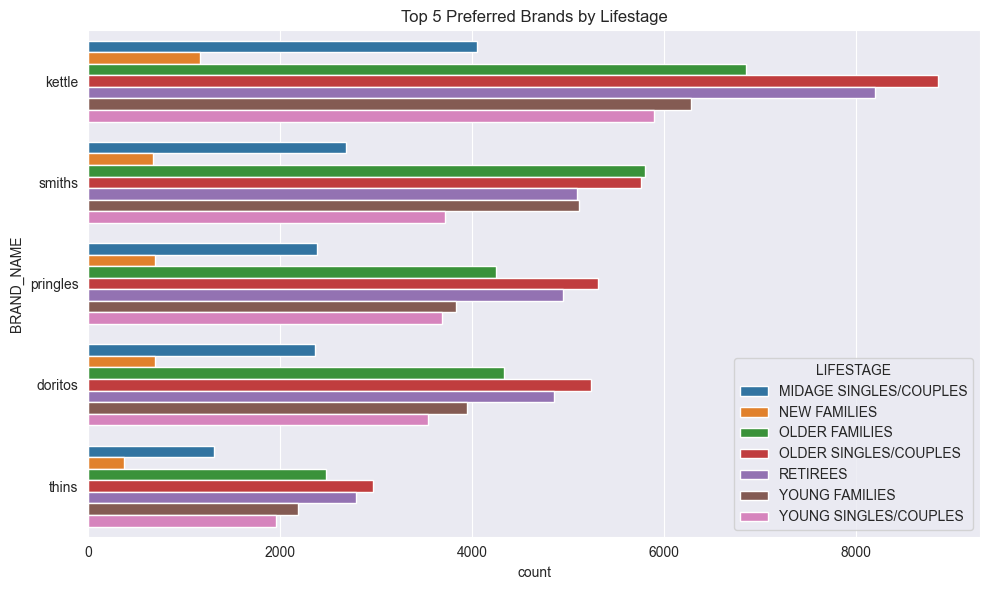

In [104]:
# Example: Preferred Brands (Top 5)
top_brands = merged_df['BRAND_NAME'].value_counts().head(5).index
plt.figure(figsize=(10, 6))
sns.countplot(y='BRAND_NAME', data=merged_df[merged_df['BRAND_NAME'].isin(top_brands)],
              hue='LIFESTAGE', order=top_brands)
plt.title('Top 5 Preferred Brands by Lifestage')
plt.tight_layout()
plt.show()

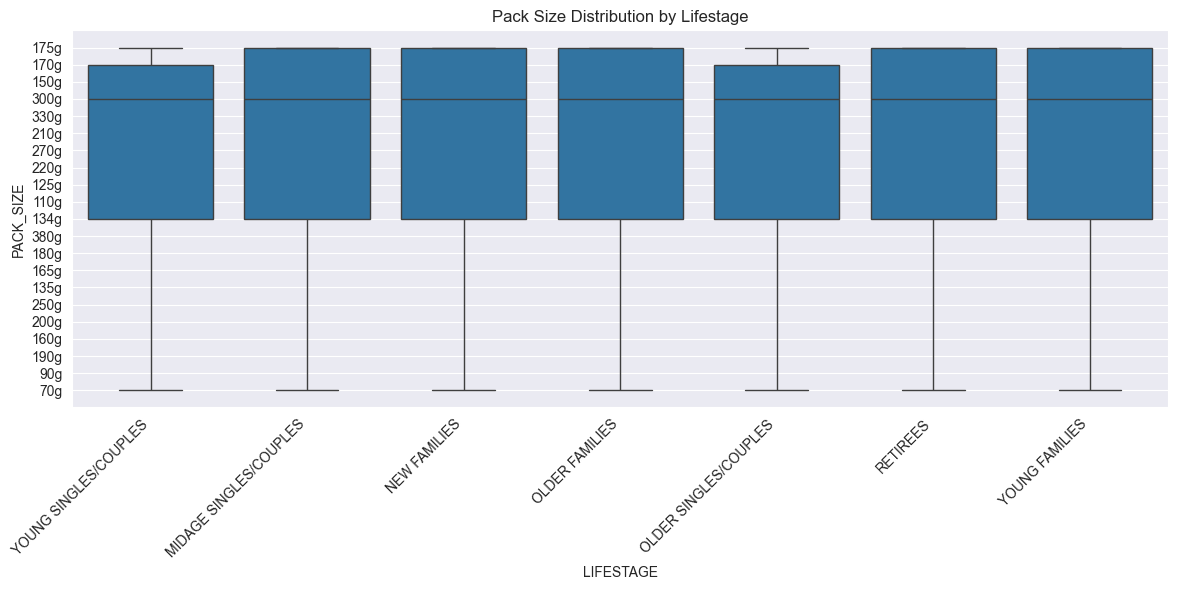

In [105]:
# Example: Pack Size Distribution by LIFESTAGE
plt.figure(figsize=(12, 6))
sns.boxplot(x='LIFESTAGE', y='PACK_SIZE', data=merged_df)
plt.title('Pack Size Distribution by Lifestage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()